In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Re-import dataset and keep only aggregated factors
df_complete = pd.read_csv('dataMASTER.csv', index_col=0)
df_partial = df_complete.drop(columns = ['retail_rec', 'grocery_pharma', 'parks', 'transit', 'work', 'total_deaths', 'total_cases'])

In [3]:
df_partial.head()

,country,population,gdp,medianAge,actual_beds,mortality_rate,residential,average_change_outside,normalized_mortality_rate
0,Afghanistan,37172386.0,1.936297e+10,19.5,18586.1930,0.025569,16.0,-33.4,0.341651
1,Angola,30809762.0,1.057510e+11,15.9,24647.8096,0.044444,19.0,-27.8,0.006491
2,United Arab Emirates,9630959.0,4.141790e+11,38.4,11557.1508,0.010325,30.0,-50.2,2.107786
3,Argentina,44494502.0,5.198720e+11,32.4,222472.5100,0.048702,21.0,-56.0,0.716943
4,Antigua and Barbuda,96286.0,1.610574e+09,32.7,365.8868,0.120000,31.0,-42.0,3.115718


In [4]:
#Check data types
print(df_partial.dtypes)
print(len(df_partial))

country                       object
population                   float64
gdp                          float64
medianAge                    float64
actual_beds                  float64
mortality_rate               float64
residential                  float64
average_change_outside       float64
normalized_mortality_rate    float64
dtype: object
115


In [10]:
#Descriptive Statistics
pd.options.display.float_format = '{:,.2f}'.format
df_partial.describe(include='all')

,country,population,gdp,medianAge,actual_beds,mortality_rate,residential,average_change_outside,normalized_mortality_rate
count,115,115.00,115.00,115.00,115.00,115.00,114.00,115.00,115.00
unique,115,nan,nan,nan,nan,nan,nan,nan,nan
top,Singapore,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,"43,522,163.31","564,403,466,015.01",31.77,"90,933.20",0.04,19.45,-33.35,5.35
std,NaN,"134,625,847.94","2,037,230,154,203.81",9.28,"215,558.25",0.05,8.71,19.13,12.56
min,NaN,"96,286.00","1,458,156,026.00",14.80,365.89,0.00,2.00,-74.60,0.00
25%,NaN,"4,835,241.50","24,049,744,991.50",24.10,"8,734.63",0.01,13.00,-48.30,0.15
50%,NaN,"10,731,726.00","70,885,325,883.00",31.20,"22,191.46",0.03,18.00,-33.00,0.53
75%,NaN,"32,844,601.50","366,223,000,000.00",40.75,"76,242.51",0.06,25.00,-17.90,3.68


In [11]:
#Correlation Analysis
corr = df_partial.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,population,gdp,medianAge,actual_beds,mortality_rate,residential,average_change_outside,normalized_mortality_rate
population,1,0.34,-0.048,0.57,0.015,0.072,-0.13,0.0036
gdp,0.34,1,0.21,0.65,0.14,-0.021,0.061,0.29
medianAge,-0.048,0.21,1,0.25,0.23,-0.071,0.071,0.41
actual_beds,0.57,0.65,0.25,1,0.1,-0.054,0.025,0.14
mortality_rate,0.015,0.14,0.23,0.1,1,-0.017,0.012,0.55
residential,0.072,-0.021,-0.071,-0.054,-0.017,1,-0.86,0.06
average_change_outside,-0.13,0.061,0.071,0.025,0.012,-0.86,1,-0.0052
normalized_mortality_rate,0.0036,0.29,0.41,0.14,0.55,0.06,-0.0052,1


AxesSubplot(0.125,0.125;0.775x0.755)


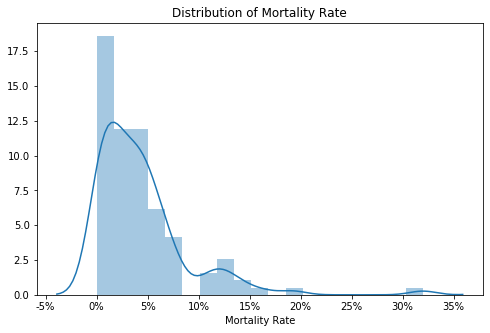

In [19]:
#Distribution Plots
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['mortality_rate'])
g.set_title('Distribution of Mortality Rate')
g.set_xlabel('Mortality Rate')
xlabels = ['{:,.0f}'.format(x) + '%' for x in g.get_xticks()*100]
g.set_xticklabels(xlabels)
print(g)

AxesSubplot(0.125,0.125;0.775x0.755)


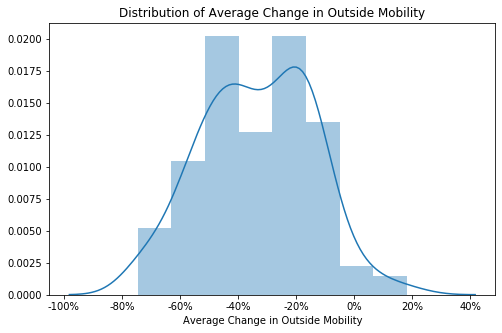

In [23]:
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['average_change_outside'])
g.set_title('Distribution of Average Change in Outside Mobility')
g.set_xlabel('Average Change in Outside Mobility')
xlabels = ['{:,.0f}'.format(x) + '%' for x in g.get_xticks()]
g.set_xticklabels(xlabels)
print(g)

AxesSubplot(0.125,0.125;0.775x0.755)


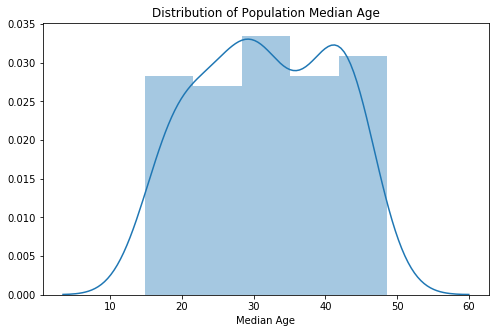

In [24]:
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['medianAge'])
g.set_title('Distribution of Population Median Age')
g.set_xlabel('Median Age')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
print(g)

AxesSubplot(0.125,0.125;0.775x0.755)


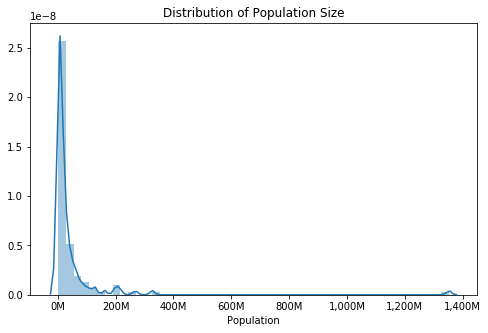

In [26]:
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['population'])
g.set_title('Distribution of Population Size')
g.set_xlabel('Population')
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
print(g)

AxesSubplot(0.125,0.125;0.775x0.755)


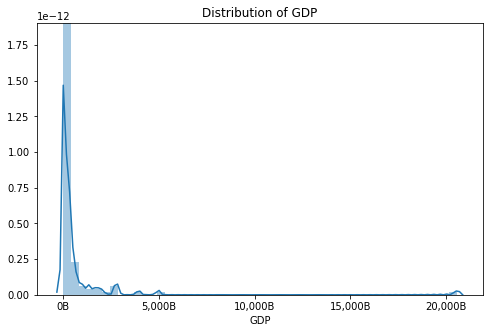

In [28]:
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['gdp'])
g.set_title('Distribution of GDP')
g.set_xlabel('GDP')
xlabels = ['{:,.0f}'.format(x) + 'B' for x in g.get_xticks()/1000000000]
g.set_xticklabels(xlabels)
print(g)

AxesSubplot(0.125,0.125;0.775x0.755)


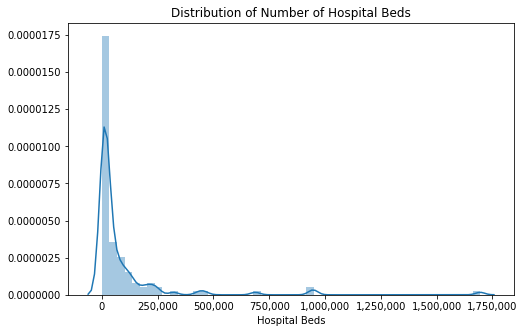

In [31]:
plt.subplots(figsize=(8, 5))  
g = sns.distplot(df_partial['actual_beds'])
g.set_title('Distribution of Number of Hospital Beds')
g.set_xlabel('Hospital Beds')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
print(g)

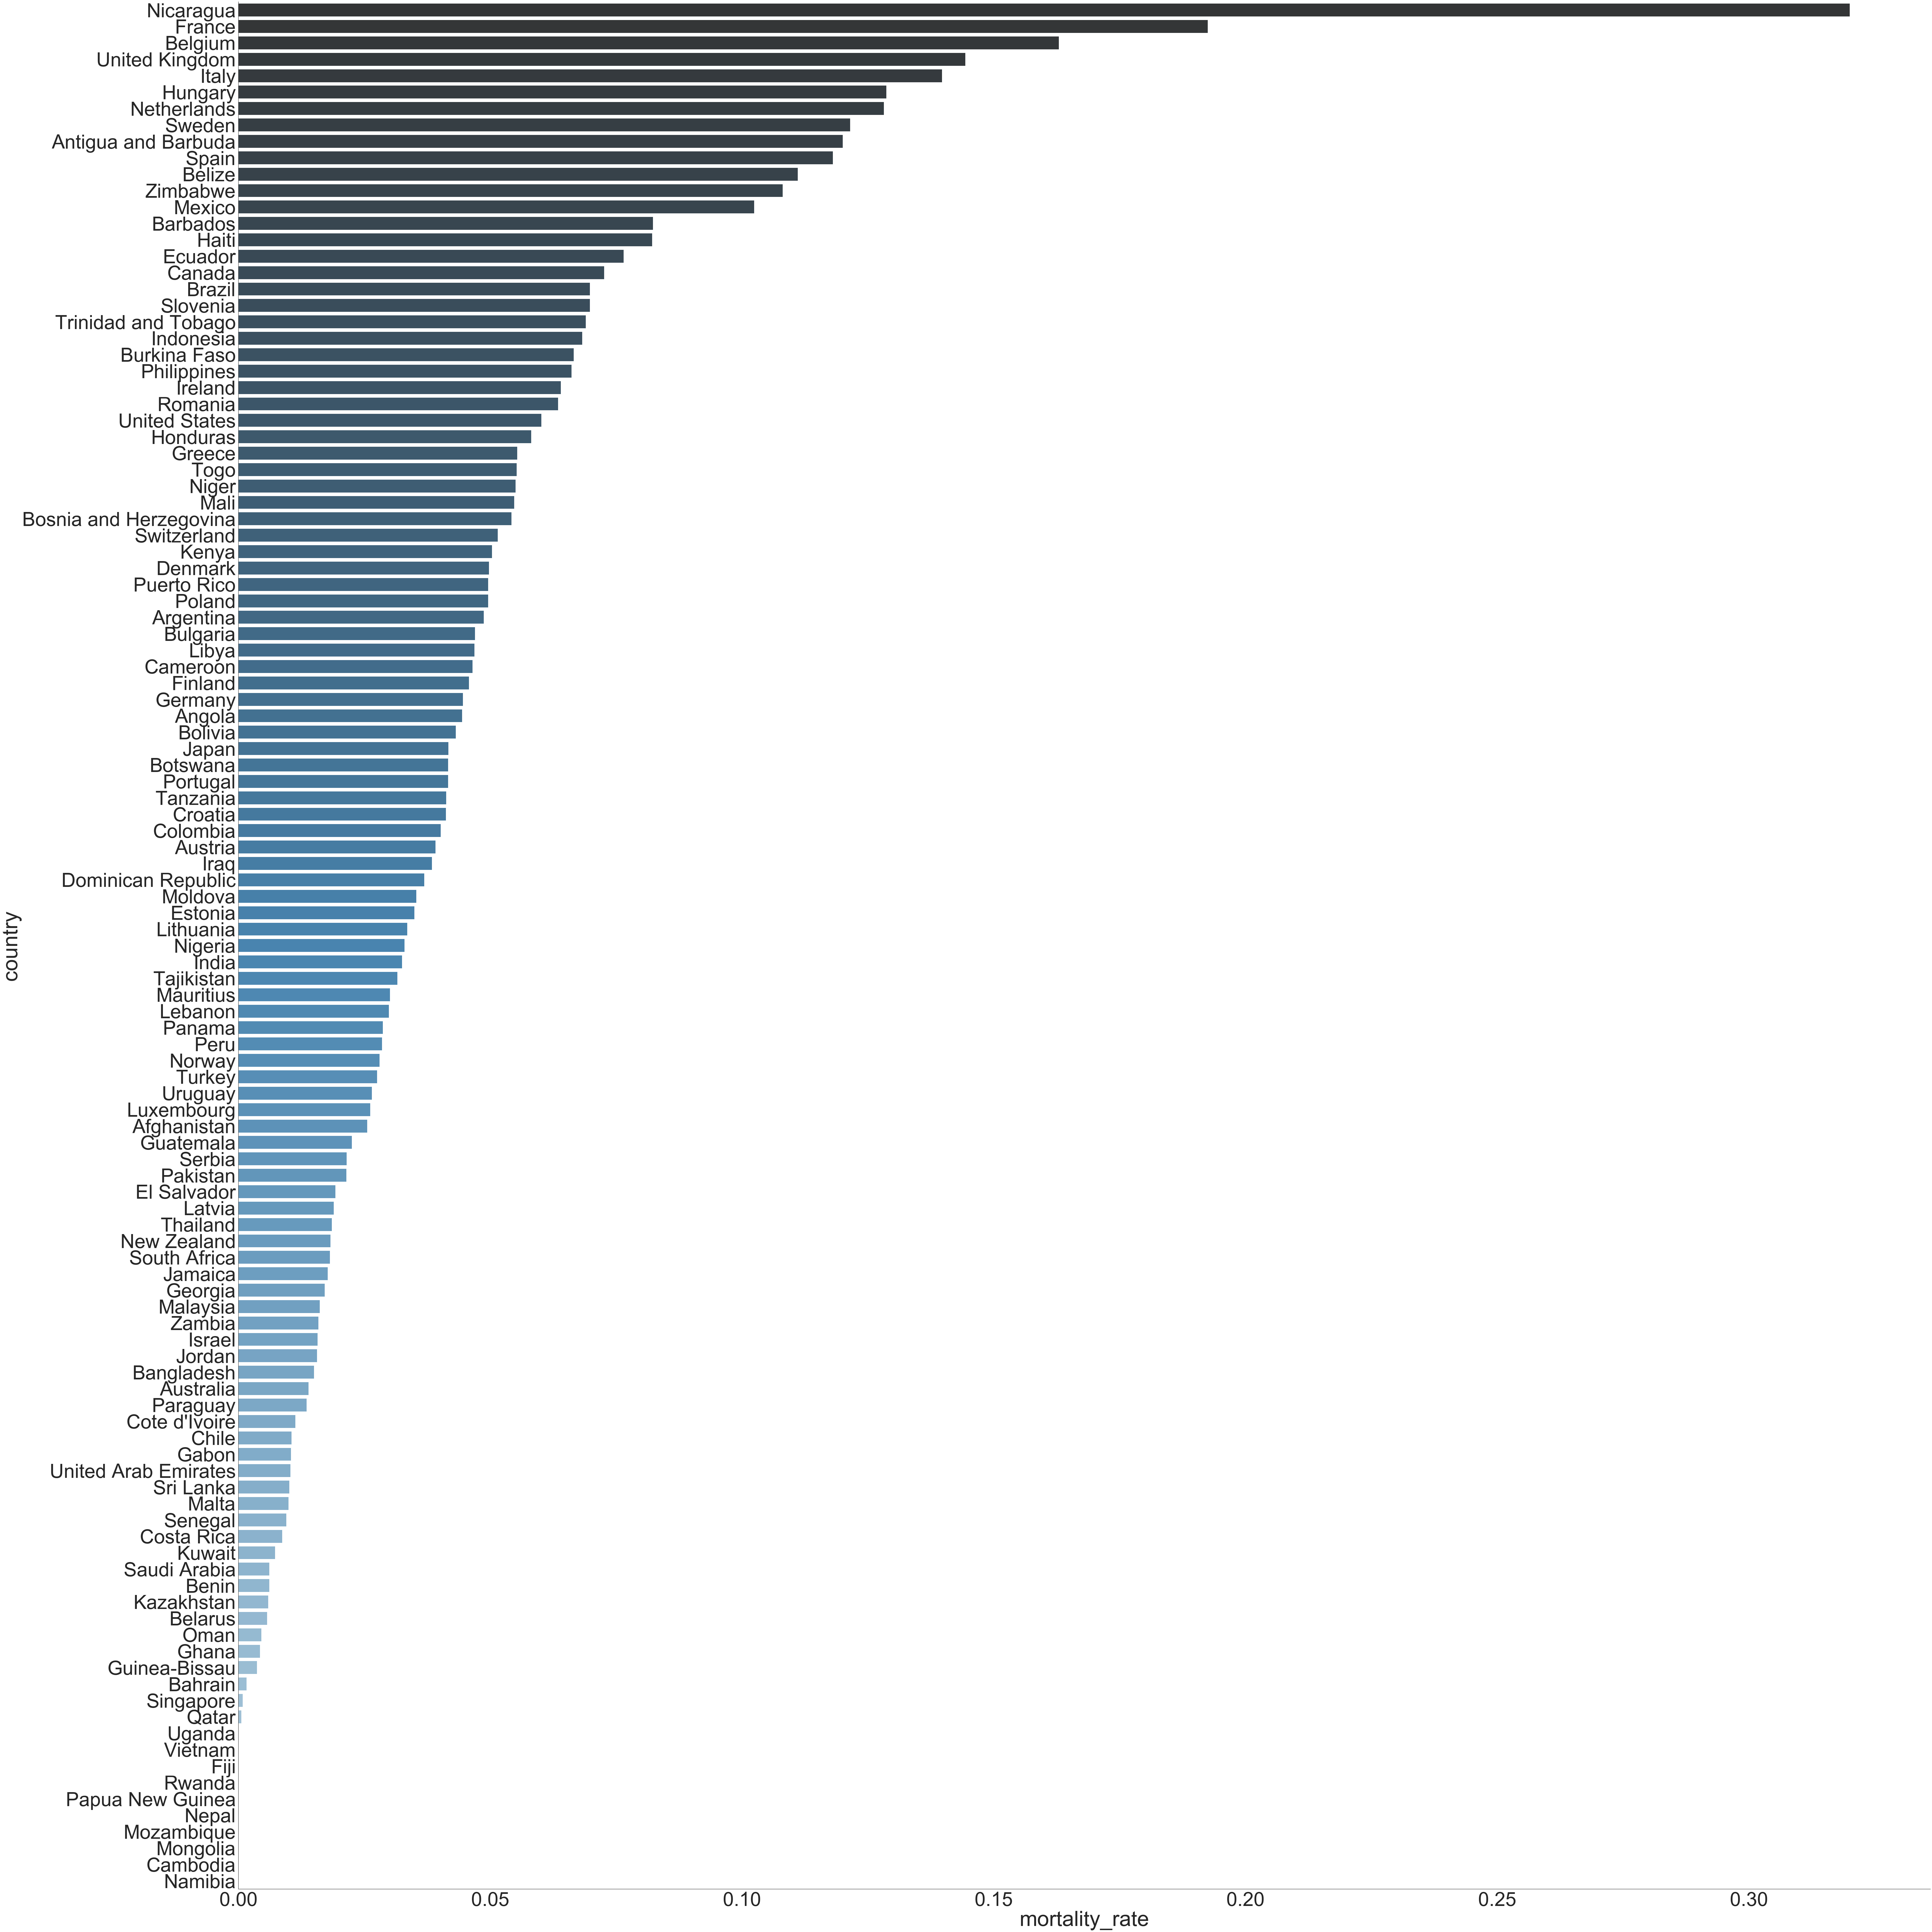

In [35]:
#Mortality Rates by Country
sns.set(font_scale=6.5)
sns.set_style('white')
df_sorted = df_partial.sort_values('mortality_rate', ascending = False).reset_index()
sns.catplot(x = 'mortality_rate', y = 'country', kind = 'bar', palette='Blues_d', data = df_sorted, height = 100);

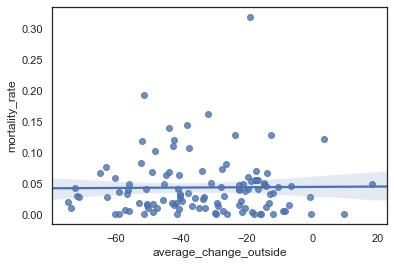

In [37]:
#Social Distancing and Mortality Rate
sns.set(font_scale=1)
sns.set_style('white')
sns.regplot(y = 'mortality_rate', x = 'average_change_outside', data = df_partial);

In [41]:
#Social Distancing and Mortality Rate Regression
x = df_partial['average_change_outside']
x = sm.add_constant(x)
y = df_partial['mortality_rate']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

/Users/alexandrabadescu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.01498
Date:                Thu, 14 May 2020   Prob (F-statistic):              0.903
Time:                        22:03:19   Log-Likelihood:                 190.15
No. Observations:                 115   AIC:                            -376.3
Df Residuals:                     113   BIC:                            -370.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0444      0.009      5.055      0.000       0.027       0.062
average_change_outside    2.8e-05      0.000      0.122      0.903      -0.000       0.000
==============================================================================
Omnibus:                       87.736   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              639.647
Skew:                           2.585   Prob(JB):                    1.27e-139
Kurtosis:                      13.333   Cond. No.                         77.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

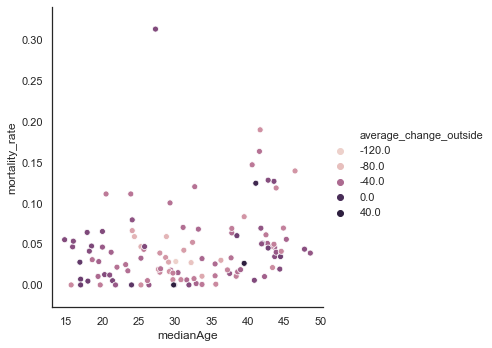

In [13]:
#Median Age and Mortality Rate
sns.relplot(x = 'medianAge', y = 'mortality_rate', hue = 'average_change_outside', data = df_partial);

In [42]:
#Median Age and Mortality Rate Regression
x = df_partial['medianAge']
x = sm.add_constant(x)
y = df_partial['mortality_rate']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.605
Date:                Thu, 14 May 2020   Prob (F-statistic):             0.0115
Time:                        22:13:26   Log-Likelihood:                 193.41
No. Observations:                 115   AIC:                            -382.8
Df Residuals:                     113   BIC:                            -377.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.015      0.400      0.690      -0.024       0.036
medianAge      0.0012      0.000      2.570      0.011       0.000       0.002
==============================================================================
Omnibus:                       94.615   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.225
Skew:                           2.750   Prob(JB):                    9.71e-188
Kurtosis:                      15.226   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

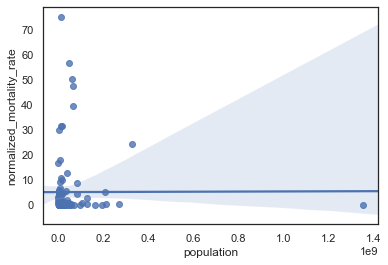

In [14]:
#Population and Normalized Mortality Rate
sns.regplot(x = 'population', y = 'normalized_mortality_rate', data = df_partial);

In [45]:
#Population and Normalized Mortality Rate Regression
x = df_partial['population']
x = sm.add_constant(x)
y = df_partial['normalized_mortality_rate']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     normalized_mortality_rate   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.009
Method:                        Least Squares   F-statistic:                  0.001505
Date:                       Thu, 14 May 2020   Prob (F-statistic):              0.969
Time:                               22:19:55   Log-Likelihood:                -453.69
No. Observations:                        115   AIC:                             911.4
Df Residuals:                            113   BIC:                             916.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3348      1.237      4.313      0.000       2.884       7.785
population  3.406e-10   8.78e-09      0.039      0.969    -1.7e-08    1.77e-08
==============================================================================
Omnibus:                      110.959   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.752
Skew:                           3.493   Prob(JB):                    8.17e-223
Kurtosis:                      15.831   Cond. No.                     1.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

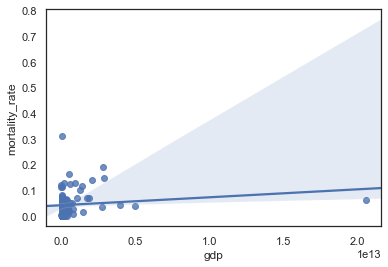

In [15]:
#GDP and Mortality Rate
sns.regplot(x = 'gdp', y = 'mortality_rate', data = df_partial);

In [46]:
#MGDP and Mortality Rate Regression
x = df_partial['gdp']
x = sm.add_constant(x)
y = df_partial['mortality_rate']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.192
Date:                Fri, 15 May 2020   Prob (F-statistic):              0.141
Time:                        08:18:51   Log-Likelihood:                 191.24
No. Observations:                 115   AIC:                            -378.5
Df Residuals:                     113   BIC:                            -373.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0417      0.004      9.311      0.000       0.033       0.051
gdp          3.15e-15   2.13e-15      1.481      0.141   -1.06e-15    7.36e-15
==============================================================================
Omnibus:                       90.189   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              707.543
Skew:                           2.646   Prob(JB):                    2.29e-154
Kurtosis:                      13.938   Cond. No.                     2.19e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

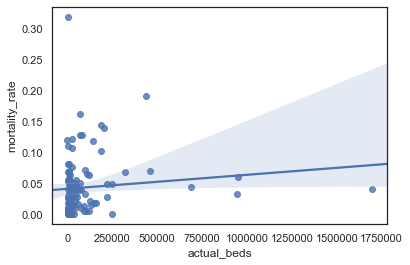

In [38]:
#Hospital Beds and Mortality Rate
sns.regplot(x = 'actual_beds', y = 'mortality_rate', data = df_partial);

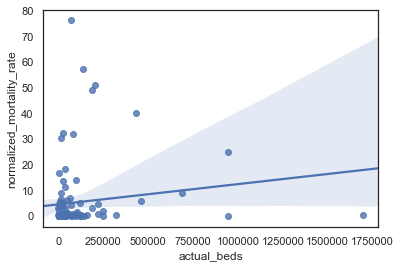

In [47]:
#Hospital Beds and Normalized Mortality Rate
sns.regplot(x = 'actual_beds', y = 'normalized_mortality_rate', data = df_partial);

In [48]:
#Hospital Beds and Normalized Mortality Rate Regression
x = df_partial['actual_beds']
x = sm.add_constant(x)
y = df_partial['normalized_mortality_rate']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     normalized_mortality_rate   R-squared:                       0.018
Model:                                   OLS   Adj. R-squared:                  0.010
Method:                        Least Squares   F-statistic:                     2.112
Date:                       Fri, 15 May 2020   Prob (F-statistic):              0.149
Time:                               08:32:03   Log-Likelihood:                -452.63
No. Observations:                        115   AIC:                             909.3
Df Residuals:                            113   BIC:                             914.8
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6319      1.266      3.659      0.000       2.124       7.140
actual_beds  7.893e-06   5.43e-06      1.453      0.149   -2.87e-06    1.87e-05
==============================================================================
Omnibus:                      110.817   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.160
Skew:                           3.466   Prob(JB):                    5.54e-229
Kurtosis:                      16.089   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""